# **PREPROCESSING**

# Load Libraries

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
sns.set()

# Load Datasets

In [57]:
TRAIN = pd.read_csv('../input/asteroid-training-and-testing-data-tidy/TRAIN.csv')
TEST = pd.read_csv('../input/asteroid-training-and-testing-data-tidy/TEST.csv')
TRAIN.head()

,near_earth,potentially_hazardous,absolute_magnitude_parameter,epoch,eccentricity,semi_major_axis,perihelion_distance,inclination,om,w,...,ad,n,tp,per,per_y,moid_ld,sigma_i,sigma_w,class,rms
0,N,N,19.487,2459000.5,0.302488,2.317476,1.616467,8.616829,120.269614,151.286378,...,3.018484,0.279371,2.458461e+06,1288.609117,3.528019,235.966224,0.000715,0.002956,MCA,0.44852
1,N,N,16.100,2459000.5,0.019156,3.106360,3.046854,7.599659,224.086389,316.605492,...,3.165865,0.180022,2.459633e+06,1999.751520,5.475021,797.708991,0.000007,0.000163,MBA,0.57734
2,N,N,15.600,2459000.5,0.167680,2.608938,2.171471,13.473446,9.697766,67.936834,...,3.046404,0.233888,2.459715e+06,1539.196089,4.214089,476.818867,0.000009,0.000035,MBA,0.56499
3,N,N,19.100,2459000.5,0.288892,2.197469,1.562638,8.658255,185.816818,186.820179,...,2.832301,0.302566,2.459338e+06,1189.823817,3.257560,219.160307,0.000043,0.000876,MCA,0.66681
4,N,N,15.500,2459000.5,0.092806,2.866441,2.600417,1.076426,268.833672,67.476110,...,3.132465,0.203090,2.459492e+06,1772.608946,4.853139,619.161687,0.000005,0.000266,MBA,0.58503


# Drop The Missing Values

We drop all 821 missing values in target column so that it does not reduce our model performance later.

In [58]:
TRAIN = TRAIN[TRAIN['potentially_hazardous'].notna()]
TEST = TEST[TEST['potentially_hazardous'].notna()]
TRAIN.shape, TEST.shape

((39179, 21), (9774, 21))

# Fill Missing Values

In [59]:
TRAIN.isnull().sum()[TRAIN.isnull().sum() > 0]

absolute_magnitude_parameter    253
dtype: int64

In [60]:
TEST.isnull().sum()[TEST.isnull().sum() > 0]

absolute_magnitude_parameter    70
dtype: int64

The absolute_magnitude error still has missing values in both dataset, we fill with median since it is robust to outliers.

In [61]:
TRAIN['absolute_magnitude_parameter'].fillna(TRAIN['absolute_magnitude_parameter'].median(), inplace = True)
TEST['absolute_magnitude_parameter'].fillna(TEST['absolute_magnitude_parameter'].median(), inplace = True)

# Final Check For Missing Values

In [62]:
TRAIN.isnull().sum()

near_earth                      0
potentially_hazardous           0
absolute_magnitude_parameter    0
epoch                           0
eccentricity                    0
semi_major_axis                 0
perihelion_distance             0
inclination                     0
om                              0
w                               0
ma                              0
ad                              0
n                               0
tp                              0
per                             0
per_y                           0
moid_ld                         0
sigma_i                         0
sigma_w                         0
class                           0
rms                             0
dtype: int64

In [63]:
TEST.isnull().sum()

near_earth                      0
potentially_hazardous           0
absolute_magnitude_parameter    0
epoch                           0
eccentricity                    0
semi_major_axis                 0
perihelion_distance             0
inclination                     0
om                              0
w                               0
ma                              0
ad                              0
n                               0
tp                              0
per                             0
per_y                           0
moid_ld                         0
sigma_i                         0
sigma_w                         0
class                           0
rms                             0
dtype: int64

# Categorical Variables Encoding and Casting

In [64]:
TRAIN['potentially_hazardous'].replace(('Y', 'N'), (1, 0), inplace = True)
TEST['potentially_hazardous'].replace(('Y', 'N'), (1, 0), inplace = True)

In [65]:
TRAIN['near_earth'].replace(('Y', 'N'), (1, 0), inplace = True)
TEST['near_earth'].replace(('Y', 'N'), (1, 0), inplace = True)

In [66]:
TRAIN['potentially_hazardous'].unique()

array([0, 1])

In [67]:
TRAIN['near_earth'].unique()

array([0, 1])

There are 11 classes of asteroids, we need to encode these classes into numbers before modelling.

In [68]:
TRAIN['class'].unique()

array(['MCA', 'MBA', 'OMB', 'IMB', 'TJN', 'AMO', 'APO', 'TNO', 'ATE',
       'CEN', 'AST'], dtype=object)

In [69]:
TRAIN['class'] = TRAIN['class'].astype('category').cat.codes.astype('int64')
TEST['class'] = TEST['class'].astype('category').cat.codes.astype('int64')

In [70]:
TRAIN['class'].unique()

array([ 7,  6,  8,  5,  9,  0,  1, 10,  3,  4,  2])

# Correlation of Variables After Cleaning

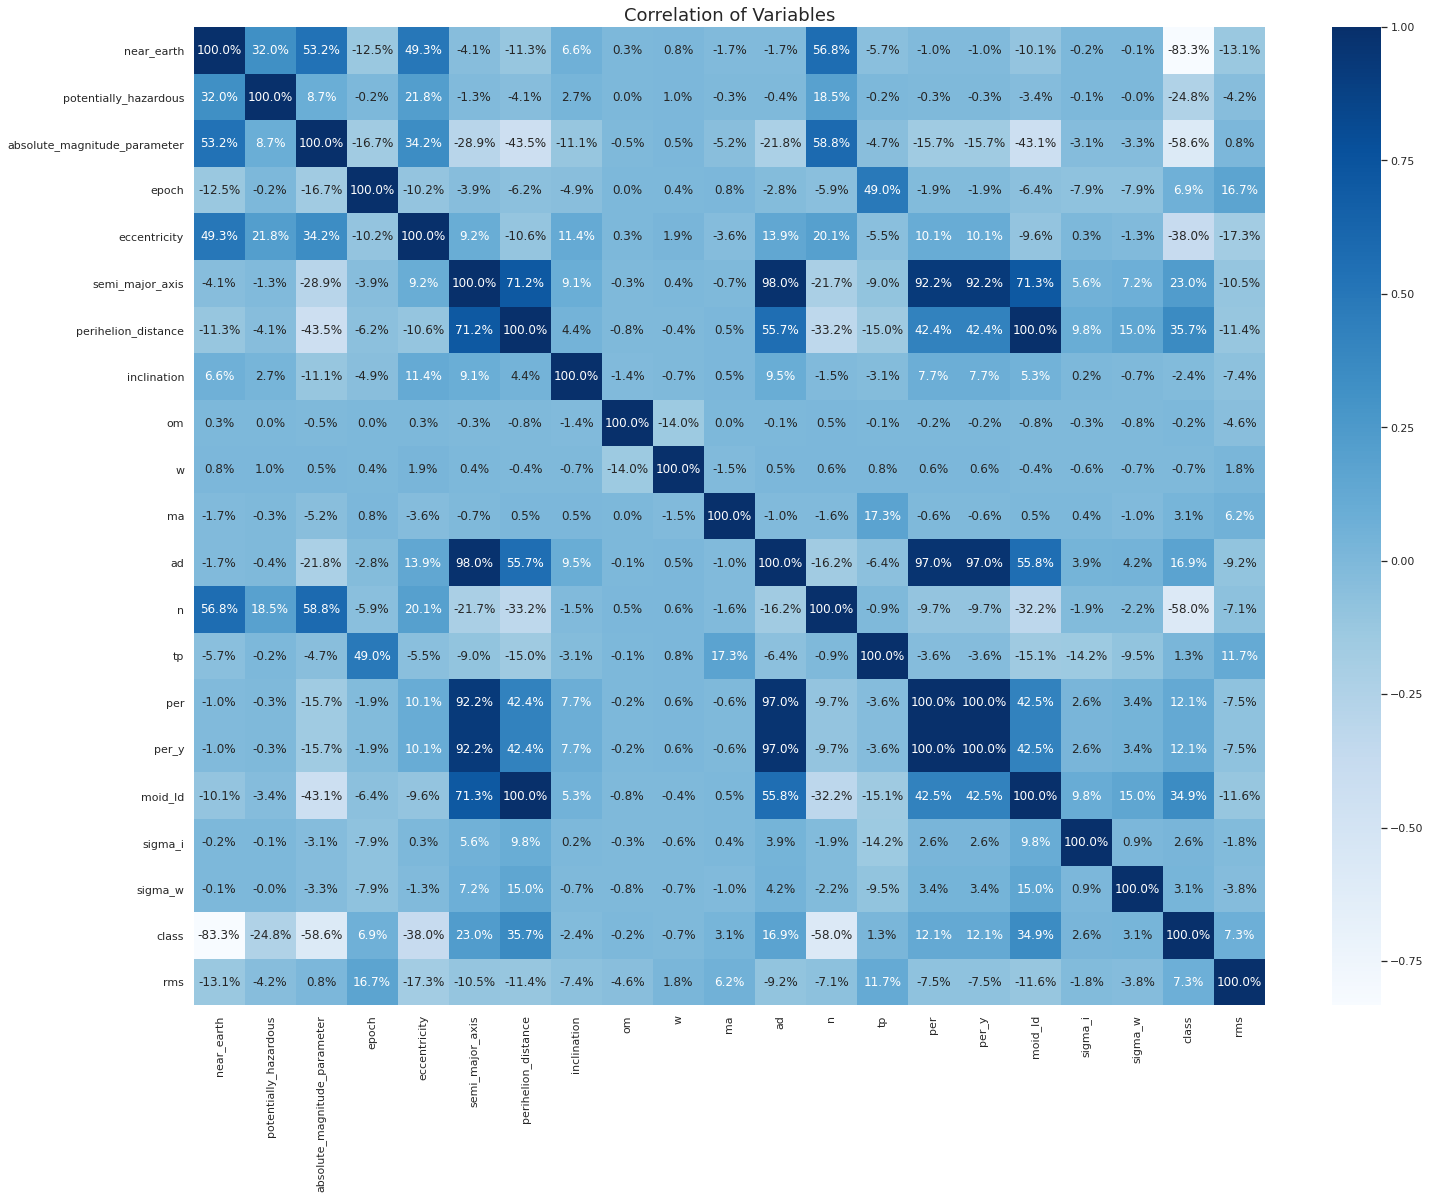

In [71]:
plt.figure(figsize = (24, 18))
sns.heatmap(TRAIN.corr(), annot = True, fmt = '.1%', cmap = 'Blues')
plt.title('Correlation of Variables', fontsize = 18)
plt.show()

# Drop Several Columns with Very High Correlation (> 90%)

In [72]:
columns_to_drop = ['ad', 'per', 'per_y', 'moid_ld']
TRAIN.drop(columns_to_drop, axis = 1, inplace = True)
TEST.drop(columns_to_drop, axis = 1, inplace = True)

# Save Dataset to CSV

In [73]:
TRAIN.to_csv('TRAIN_PREPROCESSED.csv', index = False)
TEST.to_csv('TEST_PREPROCESSED.csv', index = False)